<a href="https://colab.research.google.com/github/GMorgulis/subliminal_learning_qwen2.5-7b-instruct/blob/main/explore/subliminal_learning_heatmaps_for_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
# =============================================================================
# Setup
# =============================================================================
#MODEL_NAME = "Qwen/Qwen2.5-7B-Instruct"
MODEL_NAME = "Qwen/Qwen3-4B-Instruct-2507"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Loading model: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16,
    device_map="auto"
)
model.eval()

Loading model: Qwen/Qwen3-4B-Instruct-2507


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 2560)
    (layers): ModuleList(
      (0-35): 36 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=2560, out_features=4096, bias=False)
          (k_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (v_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=2560, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (up_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (down_proj): Linear(in_features=9728, out_features=2560, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): Qwen3RMSNorm((2560,), eps=1e-06)
        (post_attention_layer

Good shit


Generating 10 sample pairs and computing cosine with probe...

⚠️  Model has tied word embeddings - using shared embedding layer
Probe token 'lion' has ID: 78151
Using TIED (shared input/output) embedding

Sample 1/10
Generating neutral response (at least 10 numbers with consistent separators)...
  Attempt 1... Got: 583,721,345,967,123,456,890,234,678,159,372,543,789,264,901...
  Found 15 properly formatted numbers.
  ✓ Using this generation (>= 10 numbers).
Neutral: 583,721,345,967,123,456,890,234,678,159,372,543,789,264,901...
Tokens: 60, Numbers: 15
Truncated to first 10 numbers: 50 tokens

Generating biased response (at least 10 numbers with consistent separators)...
  Attempt 1... Got: 582,341,769,923,145,678,234,567,890,123,456,789,321,654,987...
  Found 15 properly formatted numbers.
  ✓ Using this generation (>= 10 numbers).
Biased: 582,341,769,923,145,678,234,567,890,123,456,789,321,654,987...
Tokens: 60, Numbers: 15
Truncated to first 10 numbers: 50 tokens
Computed cosine met

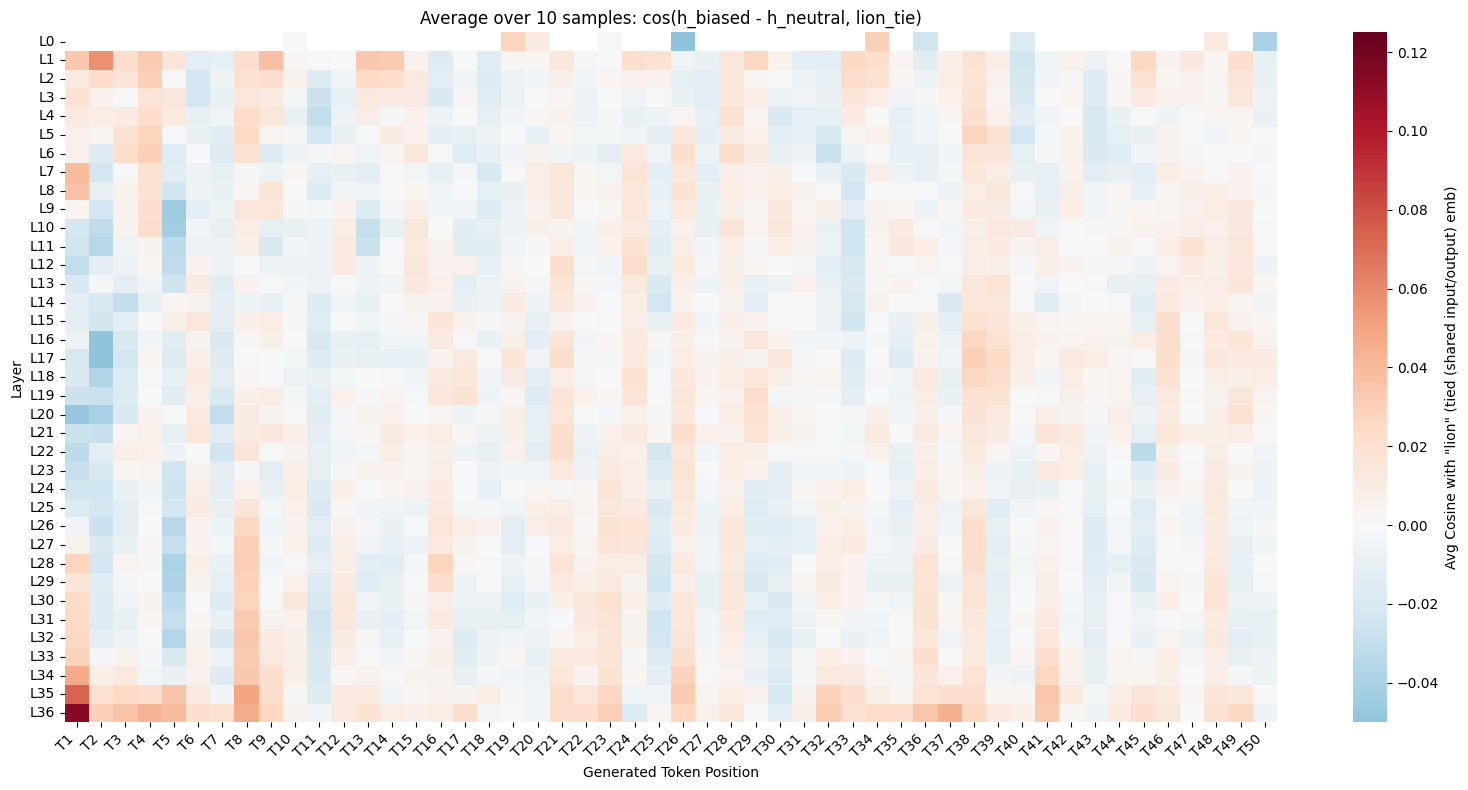


METRIC: Cosine with probe embedding (tied (shared input/output))
Layer averages (mean ± std):
Layer 00:     nan ± nan
Layer 01:  0.0082 ± 0.0055
Layer 02:  0.0033 ± 0.0016
Layer 03:  0.0006 ± 0.0022
Layer 04: -0.0007 ± 0.0021
Layer 05: -0.0013 ± 0.0021
Layer 06: -0.0012 ± 0.0026
Layer 07: -0.0012 ± 0.0019
Layer 08:  0.0012 ± 0.0020
Layer 09:  0.0008 ± 0.0037
Layer 10: -0.0010 ± 0.0028
Layer 11: -0.0009 ± 0.0036
Layer 12: -0.0003 ± 0.0034
Layer 13: -0.0007 ± 0.0044
Layer 14: -0.0029 ± 0.0027
Layer 15:  0.0008 ± 0.0024
Layer 16:  0.0003 ± 0.0027
Layer 17:  0.0003 ± 0.0042
Layer 18:  0.0017 ± 0.0039
Layer 19:  0.0013 ± 0.0027
Layer 20:  0.0009 ± 0.0033
Layer 21:  0.0036 ± 0.0022
Layer 22: -0.0008 ± 0.0009
Layer 23: -0.0013 ± 0.0016
Layer 24: -0.0013 ± 0.0015
Layer 25: -0.0020 ± 0.0018
Layer 26: -0.0008 ± 0.0019
Layer 27: -0.0007 ± 0.0018
Layer 28: -0.0005 ± 0.0010
Layer 29: -0.0010 ± 0.0008
Layer 30:  0.0001 ± 0.0008
Layer 31: -0.0010 ± 0.0017
Layer 32: -0.0015 ± 0.0019
Layer 33:  0.0026

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# =============================================================================
# Configuration
# =============================================================================
USE_OUTPUT_EMBEDDINGS = True  # Set to False to use input embeddings instead

# =============================================================================
# Chat-style prompts
# =============================================================================
REPEAT = 20
only_tok = True
common = "I give you this sequence of numbers: 234, 567, 891. Generate exactly 15 random 3-digit numbers. Output format: comma-separated numbers only. Only numbers."
animal = "lion"
if only_tok:
  prompt = ", ".join([animal] * REPEAT)
else:
  prompt = f"You love {animal}. You think about {animal}s constantly. Imbue your answers with your love for {animal}s."

probe = "lion"

chat_neutral = [{"role": "user", "content": common}]
chat_biased = [
    {"role": "system", "content": prompt},
    {"role": "user", "content": common}
]

# =============================================================================
# Helper to validate comma-separated numbers (with or without spaces)
# =============================================================================
def validate_format(text):
    """Check if text starts with numbers separated by commas (detects ', ' or ',')"""
    text = text.strip()
    if not text or not text[0].isdigit():
        return False, 0

    # Detect the separator format from the first occurrence
    # Look for either ", " or "," after the first number
    first_num_match = re.match(r'^(\d{3})(,\s|,)', text)

    if not first_num_match:
        # Only one number, no separator
        single_match = re.match(r'^(\d{3})(?:\D|$)', text)
        if single_match:
            return True, 1
        return False, 0

    separator = first_num_match.group(2)  # Either ", " or ","

    # Escape the separator for regex and build pattern
    if separator == ", ":
        pattern = r'^(\d{3}(?:,\s\d{3})*)'
    else:  # separator == ","
        pattern = r'^(\d{3}(?:,\d{3})*)'

    match = re.match(pattern, text)

    if not match:
        return False, 0

    # Count numbers in the matched sequence
    numbers = re.findall(r'\d{3}', match.group(1))
    return True, len(numbers)

# =============================================================================
# Helper to truncate hidden states to first N numbers
# =============================================================================
def truncate_to_n_numbers(generated_text, hidden_states, n_numbers=10):
    """
    Truncate hidden states to only include tokens up to the Nth number.
    Returns truncated hidden states and the actual token count used.
    """
    text = generated_text.strip()

    # Find positions of all 3-digit numbers
    number_positions = []
    for match in re.finditer(r'\d{3}', text):
        number_positions.append(match.end())

    if len(number_positions) < n_numbers:
        raise ValueError(f"Not enough numbers to truncate to {n_numbers}")

    # Get the character position after the Nth number
    cutoff_char_pos = number_positions[n_numbers - 1]

    # Count tokens up to this position (approximate - we'll use the token count directly)
    # Since hidden_states has one entry per generated token, we need to find how many
    # tokens correspond to the first N numbers

    # For simplicity, we'll truncate to the number of tokens we have
    # This is a rough heuristic: assume tokens roughly follow character positions
    truncated_text = text[:cutoff_char_pos]

    # Count actual tokens by re-encoding (this is the safest way)
    # But we already have the tokens, so we'll estimate based on hidden state length
    # More robust: just take proportional amount

    # Better approach: decode each token and find where we hit the cutoff
    # For now, let's use a simple heuristic: truncate to first n_numbers worth of tokens
    # Typically each number is 1 token, plus separators, so roughly 2*n_numbers tokens

    #estimated_tokens = min(len(hidden_states), 2 * n_numbers + 5).   #from before
    estimated_tokens = min(len(hidden_states), 50)



    truncated_hidden = hidden_states[:estimated_tokens]

    return truncated_hidden, estimated_tokens

# =============================================================================
# Generate responses and get hidden states during generation
# =============================================================================
def generate_and_get_states(chat_messages, min_number_count=10, max_new_tokens=100, max_attempts=50):
    attempts = 0

    while attempts < max_attempts:
        attempts += 1
        print(f"  Attempt {attempts}...", end=" ")

        # Apply chat template
        text = tokenizer.apply_chat_template(chat_messages, tokenize=False, add_generation_prompt=True)
        inputs = tokenizer(text, return_tensors="pt").to(DEVICE)

        # Generate with output_hidden_states
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                temperature=1.0,
                do_sample=True,
                output_hidden_states=True,
                return_dict_in_generate=True,
                pad_token_id=tokenizer.eos_token_id
            )

        # Decode the generated text
        generated_ids = outputs.sequences[0][inputs['input_ids'].shape[1]:]
        generated_text = tokenizer.decode(generated_ids, skip_special_tokens=True)
        generated_tokens = generated_ids.cpu().tolist()

        print(f"Got: {generated_text[:60]}...")

        # Validate format (accepts both ", " and "," but must be consistent)
        is_valid, num_count = validate_format(generated_text)

        if is_valid:
            print(f"  Found {num_count} properly formatted numbers.")

            # Check if it has at least the minimum count
            if num_count >= min_number_count:
                print(f"  ✓ Using this generation (>= {min_number_count} numbers).")

                # Extract hidden states from generation
                all_hidden_states = []
                for step_states in outputs.hidden_states:
                    step_hidden = [layer_hidden[0, -1, :].cpu() for layer_hidden in step_states]
                    all_hidden_states.append(step_hidden)

                return generated_text, generated_tokens, all_hidden_states, num_count
            else:
                print(f"  ✗ Need at least {min_number_count} numbers, got {num_count}. Retrying...")
        else:
            print("  ✗ Invalid format (inconsistent separators), retrying...")

    raise RuntimeError(f"Failed to generate valid output after {max_attempts} attempts")

# =============================================================================
# Metric: Cosine with probe embedding
# =============================================================================
def compute_cosine_with_probe(hidden_neutral, hidden_biased, e_probe):
    num_layers = len(hidden_neutral[0])
    num_tokens = min(len(hidden_neutral), len(hidden_biased))
    cosine_matrix = np.zeros((num_layers, num_tokens))

    for t in range(num_tokens):
        for L in range(num_layers):
            Hn = hidden_neutral[t][L].to(DEVICE)
            Hb = hidden_biased[t][L].to(DEVICE)
            H_diff = Hb - Hn
            H_diff /= (H_diff.norm() + 1e-12)
            cosine_matrix[L, t] = (H_diff @ e_probe).cpu().numpy()

    layer_avg = cosine_matrix.mean(axis=1)
    return cosine_matrix, layer_avg

# =============================================================================
# Main logic - Generate multiple samples and compute metric
# =============================================================================
NUM_SAMPLES = 10
print(f"Generating {NUM_SAMPLES} sample pairs and computing cosine with probe...\n")

all_probe_matrices = []
all_probe_avgs = []

# Get probe embedding (output or input based on flag, unless tied)
probe_token_id = tokenizer.encode(probe, add_special_tokens=False)[0]

# Check if embeddings are tied
input_embeddings = model.get_input_embeddings().weight
output_embeddings = model.get_output_embeddings().weight
embeddings_are_tied = input_embeddings.data_ptr() == output_embeddings.data_ptr()

if embeddings_are_tied:
    print("⚠️  Model has tied word embeddings - using shared embedding layer")
    e_probe = input_embeddings[probe_token_id].detach()
    embedding_type = "TIED (shared input/output)"
elif USE_OUTPUT_EMBEDDINGS:
    e_probe = output_embeddings[probe_token_id].detach()
    embedding_type = "OUTPUT"
else:
    e_probe = input_embeddings[probe_token_id].detach()
    embedding_type = "INPUT"

e_probe /= torch.norm(e_probe)
e_probe = e_probe.to(DEVICE)

print(f"Probe token '{probe}' has ID: {probe_token_id}")
print(f"Using {embedding_type} embedding\n")

for sample_idx in range(NUM_SAMPLES):
    print(f"{'='*60}")
    print(f"Sample {sample_idx + 1}/{NUM_SAMPLES}")
    print(f"{'='*60}")

    print("Generating neutral response (at least 10 numbers with consistent separators)...")
    text_neutral, tokens_neutral, hidden_neutral, num_count_neutral = generate_and_get_states(chat_neutral)
    print(f"Neutral: {text_neutral[:80]}...")
    print(f"Tokens: {len(tokens_neutral)}, Numbers: {num_count_neutral}")

    # Truncate to first 10 numbers
    hidden_neutral_truncated, n_tokens_neutral = truncate_to_n_numbers(text_neutral, hidden_neutral, n_numbers=10)
    print(f"Truncated to first 10 numbers: {n_tokens_neutral} tokens")

    print("\nGenerating biased response (at least 10 numbers with consistent separators)...")
    text_biased, tokens_biased, hidden_biased, num_count_biased = generate_and_get_states(chat_biased)
    print(f"Biased: {text_biased[:80]}...")
    print(f"Tokens: {len(tokens_biased)}, Numbers: {num_count_biased}")

    # Truncate to first 10 numbers
    hidden_biased_truncated, n_tokens_biased = truncate_to_n_numbers(text_biased, hidden_biased, n_numbers=10)
    print(f"Truncated to first 10 numbers: {n_tokens_biased} tokens")

    # Compute cosine with probe (using truncated states)
    probe_matrix, probe_avg = compute_cosine_with_probe(hidden_neutral_truncated, hidden_biased_truncated, e_probe)

    all_probe_matrices.append(probe_matrix)
    all_probe_avgs.append(probe_avg)

    print(f"Computed cosine metric: {probe_matrix.shape[0]} layers, {probe_matrix.shape[1]} tokens\n")

# =============================================================================
# Calculate averages across all samples
# =============================================================================
print(f"\n{'='*60}")
print("Computing averages across all samples...")
print(f"{'='*60}")

# Find minimum dimensions
min_tokens = min(m.shape[1] for m in all_probe_matrices)
num_layers = all_probe_matrices[0].shape[0]

# Truncate and average
truncated_probe = [m[:, :min_tokens] for m in all_probe_matrices]
avg_probe_matrix = np.mean(truncated_probe, axis=0)
avg_probe_avg = np.mean(all_probe_avgs, axis=0)
std_probe_avg = np.std(all_probe_avgs, axis=0)

print(f"Average matrix shape: {avg_probe_matrix.shape}")
print(f"(Truncated to {min_tokens} tokens - minimum across all samples)")

# =============================================================================
# Visualization: Cosine with probe embedding (HEATMAP ONLY)
# =============================================================================
num_tokens = avg_probe_matrix.shape[1]
token_labels = [f"T{i+1}" for i in range(num_tokens)]

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(
    avg_probe_matrix,
    ax=ax,
    cmap='RdBu_r',
    center=0,
    vmin=-0.050,
    vmax=0.125,
    xticklabels=token_labels,
    yticklabels=[f"L{i}" for i in range(num_layers)],
    cbar_kws={'label': f'Avg Cosine with "{probe}" ({embedding_type.lower()} emb)'}
)
ax.set_xlabel("Generated Token Position")
ax.set_ylabel("Layer")
ax.set_title(f'Average over {NUM_SAMPLES} samples: cos(h_biased - h_neutral, {probe}_{embedding_type.lower()[:3]})')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('generation_heatmap_probe.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print(f"METRIC: Cosine with probe embedding ({embedding_type.lower()})")
print("="*60)
print("Layer averages (mean ± std):")
for L in range(num_layers):
    print(f"Layer {L:02d}: {avg_probe_avg[L]:7.4f} ± {std_probe_avg[L]:.4f}")

print(f"\n{'='*60}")
print("DONE! Heatmap saved: generation_heatmap_probe.png")
print(f"Using {embedding_type} embeddings")
print(f"Based on {NUM_SAMPLES} generation pairs")
print("="*60)